In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and info 

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# EDA

### Age and Gender analysis for diabetes

In [ ]:
result = df.groupby('gender')['diabetes'].agg(
    total='count',
    diabetic='sum'
)
result['percentage'] = (result['diabetic'] / result['total']) * 100
print(result)


        total  diabetic  percentage
gender                             
Female  58552      4461    7.618869
Male    41430      4039    9.748974
Other      18         0    0.000000


In [6]:
avg_age = df.groupby('gender')['age'].agg(average_age='mean')
print(avg_age)


        average_age
gender             
Female    42.463291
Male      41.075139
Other     29.555556


In [7]:
avg_age_diabetic = (
    df[df['diabetes'] == 1]
    .groupby('gender')
    .agg(average_age_diabetic=('age', 'mean'))
)

print(avg_age_diabetic)


        average_age_diabetic
gender                      
Female             60.993499
Male               60.894776


From this analysis, the prevalence of diabetes is higher among males (9.75%) compared to females (7.62%). However, further examination of age distribution indicates that age is a more dominant factor associated with diabetes than gender alone. The average age of diabetic males and females is almost identical (60.89 years and 60.99 years, respectively), while the overall average age of males and females in the dataset is much lower (41.07 and 42.46 years). This suggests that the observed gender difference in diabetes percentage may be largely influenced by age rather than gender being an independent risk factor.

### Effect of hypertension, heart disease and smoking

diabetes          0     1
hypertension             
0             86103  6412
1              5397  2088


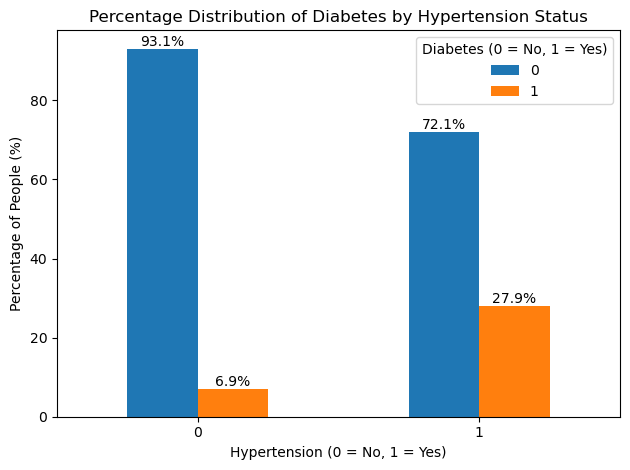

In [20]:
table = pd.crosstab(df["hypertension"], df["diabetes"])
print(table)



percentage_table = table.div(table.sum(axis=1), axis=0) * 100

# Plot the percentage bar chart
ax = percentage_table.plot(kind='bar')

plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Percentage of People (%)")
plt.title("Percentage Distribution of Diabetes by Hypertension Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()


From the analysis, it is visible that among individuals without hypertension, only 6.9% have diabetes. In contrast, 27.9% of individuals with hypertension are diabetic. This indicates that the prevalence of diabetes is considerably higher in hypertensive individuals, suggesting a strong association between hypertension and diabetes.